<a href="https://colab.research.google.com/github/lala-lagrange/Julia-sublime/blob/master/Optimised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **OPTIMISING TEST SIZE VALUE FOR ACCURACY**

In [ ]:
# IMPORTING NECESSARY LIBRARIES
import numpy as np
import pandas as pd

# DATA PRE-PROCESSING
df = pd.read_csv('/content/titanicsurvival.csv')
df = df.fillna(0)
dfx = df.drop("Fare", axis=1)

mean = dfx['Age'].mean()
dfx['Age'] = dfx['Age'].replace(0, mean)
dfx['Sex'] = dfx['Sex'].map({'male': '0', 'female': '1'})

# ASSIGNING VARIABLES
x = dfx.iloc[:, :-1].values
y = dfx.iloc[:, -1].values

# SPLITTING THE DATA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

a = np.arange(0.1,0.5,0.05)
b = np.arange(0,df.shape[0],10)
op = []
c =[]
d= []

for i in range(len(a)):
  for j in range(len(b)):
    c.append(a[i])
    d.append(b[j])
    X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=a[i],random_state=b[j])
    sc = StandardScaler()
    X_train_sc = sc.fit_transform(X_train)
    X_test_sc = sc.transform(X_test)
    knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=1)
    knn.fit(X_train_sc, Y_train)
    lr_pred = knn.predict(X_test_sc)
    acc = accuracy_score(Y_test, lr_pred) * 100
    op.append(acc)
    
    
print(len(c))
print(len(d))
print(len(op))

720
720
720


In [ ]:

data = {'Test_size':c,'Random_state':d,'Accuracy':op}
best = pd.DataFrame(data)
best

,Test_size,Random_state,Accuracy
0,0.10,0,74.444444
1,0.10,10,85.555556
2,0.10,20,86.666667
3,0.10,30,80.000000
4,0.10,40,83.333333
...,...,...,...
715,0.45,850,80.798005
716,0.45,860,78.802993
717,0.45,870,82.543641
718,0.45,880,81.546135


In [ ]:
#finding the maximum value of accuracy and printing corresponding 
#test_size value and random_state

max_x = best.loc[best['Accuracy'].idxmax()]
print( "Maximum value of accuracy  and its corresponding test size and random state values:\n", max_x)

Maximum value of accuracy  and its corresponding test size and random state values:
 Test_size         0.100000
Random_state    740.000000
Accuracy         91.111111
Name: 74, dtype: float64


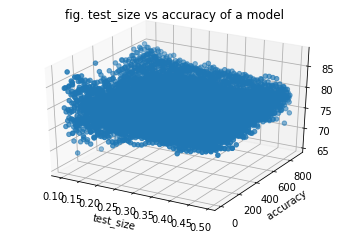

In [8]:
from matplotlib import markers
from mpl_toolkits import mplot3d
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes(projection='3d')

q1 = [c]
q2 = [d]
q3 = [op]

ax.scatter3D(q1, q2, q3);
plt.xlabel('test_size')
plt.ylabel('accuracy ')
plt.title('fig. test_size vs accuracy of a model')
plt.show()

## **TESTING WITH GAUSSIAN NB MODEL**

In [7]:
# IMPORTING NECESSARY LIBRARIES
import numpy as np
import pandas as pd

# DATA PRE-PROCESSING
df = pd.read_csv('/content/titanicsurvival.csv')
df = df.fillna(0)
dfx = df.drop("Fare", axis=1)

mean = dfx['Age'].mean()
dfx['Age'] = dfx['Age'].replace(0, mean)
dfx['Sex'] = dfx['Sex'].map({'male': '0', 'female': '1'})

# ASSIGNING VARIABLES
x = dfx.iloc[:, :-1].values
y = dfx.iloc[:, -1].values

# SPLITTING THE DATA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB


a = np.arange(0.1,0.5,0.01)
b = np.arange(0,df.shape[0],5)
op = []
c =[]
d= []

for i in range(len(a)):
  for j in range(len(b)):
    c.append(a[i])
    d.append(b[j])
    X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=a[i],random_state=b[j])
    
    gnb = GaussianNB()
    gnb.fit(X_train, Y_train)
    gnb_pred = gnb.predict(X_test)
    acc = accuracy_score(Y_test, gnb_pred) * 100
    op.append(acc)
    

data = {'Test_size':c,'Random_state':d,'Accuracy':op}
best = pd.DataFrame(data)

#finding the maximum value of accuracy and printing corresponding 
#test_size value and random_state

max_x = best.loc[best['Accuracy'].idxmax()]
print( "Maximum value of accuracy  and its corresponding test size and random state values:\n", max_x)

Maximum value of accuracy  and its corresponding test size and random state values:
 Test_size        0.100000
Random_state    45.000000
Accuracy        87.777778
Name: 9, dtype: float64


#### **we have 87.77% as highest accuracy and the corresponding value of random_state = 45, test_size = 0.1**